In [2]:
import pickle
import pandas as pd
import geopandas as gpd 

In [3]:
with open("best.p","rb") as f:
    data = pickle.load(f)


In [4]:
data.keys()
#data['gdf']


dict_keys(['actor_critic_dict', 'loss_iter', 'best_rewards', 'best_plans', 'current_rewards', 'current_plans', 'iteration'])

In [5]:
gdf = data["best_plans"][0]["gdf"]
print(data["best_plans"][0])

{'road_network': -1.0, 'life_circle': 2.3574351959252104, 'greenness': 0.480621632582595, 'wastemgmt': -0.22061532272113016, 'concept': -1.0, 'life_circle_info': {'life_circle_15min': 0.8416666666666666, 'life_circle_10min': 0.41666666666666663, 'life_circle_5min': 0.23333333333333334, 'life_circle_10min_area': 0.3926540323951571, 'decentralization_reward': 0.2198544516335743, 'utility': 0.16760617104866615, 'even_distribution_reward': 0.5552696594702184, 'traffic_reward': 1.5133235620742012, 'shopping': 0.15, 'wastemgmt': 0.15, 'education': 0.55, 'medical care': 0.8, 'entertainment': 0.5, 'working': 0.35}, 'concept_info': {}, 'land_use_reward': 19.119487877263147, 'gdf':      type  existence                                           geometry  \
0       2       True                          LINESTRING (440 0, 820 0)   
1       2       True                         LINESTRING (820 0, 1280 0)   
2       2       True                        LINESTRING (1280 0, 1700 0)   
3       2       Tru

In [6]:
gdf

,type,existence,geometry,population,traffic,rect,eqi,sc
0,2,True,"LINESTRING (440 0, 820 0)",NaN,NaN,NaN,NaN,NaN
1,2,True,"LINESTRING (820 0, 1280 0)",NaN,NaN,NaN,NaN,NaN
2,2,True,"LINESTRING (1280 0, 1700 0)",NaN,NaN,NaN,NaN,NaN
3,2,True,"LINESTRING (1700 0, 2160 0)",NaN,NaN,NaN,NaN,NaN
4,2,True,"LINESTRING (0 1860, 100 1540)",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
397,3,True,"LINESTRING (652.748 773.333, 565 773.333)",NaN,NaN,NaN,NaN,NaN
398,3,True,"LINESTRING (480.868 773.333, 565 773.333)",NaN,NaN,NaN,NaN,NaN
399,3,True,"LINESTRING (565 700, 565 773.333)",NaN,NaN,NaN,NaN,NaN
400,13,True,"POLYGON ((565 773.333, 652.748 773.333, 652.74...",NaN,NaN,0.660069,0.8515,0.722273


In [7]:
NON_BLOCK_LAND_USE = (
    'outside',
    'feasible',
    'road',
    'boundary'
)

BLOCK_LAND_USE = (
    'residential',
    'business',
    'wastemgmt',
    'green_l',
    'green_s',
    'school',
    'hospital_l',
    'hospital_s',
    'recreation',
    'office',
    'intersection',
    'waterbody'
)

LAND_USE = (
    NON_BLOCK_LAND_USE + BLOCK_LAND_USE)

OUTSIDE = 0
FEASIBLE = 1
ROAD = 2
BOUNDARY = 3
RESIDENTIAL = 4
BUSINESS = 5
WASTEMGMT = 6
GREEN_L = 7
GREEN_S = 8
SCHOOL = 9
HOSPITAL_L = 10
HOSPITAL_S = 11
RECREATION = 12
OFFICE = 13
INTERSECTION = 14
WATERBODY = 15

LAND_USE_ID = (
    OUTSIDE,
    FEASIBLE,
    ROAD,
    BOUNDARY,
    RESIDENTIAL,
    BUSINESS,
    WASTEMGMT,
    GREEN_L,
    GREEN_S,
    SCHOOL,
    HOSPITAL_L,
    HOSPITAL_S,
    RECREATION,
    OFFICE,
    INTERSECTION,
    WATERBODY
)

NUM_TYPES = len(LAND_USE_ID)

LAND_USE_ID_MAP = dict(
    zip(LAND_USE, LAND_USE_ID))

LAND_USE_ID_MAP_INV = dict(
    zip(LAND_USE_ID, LAND_USE))


PUBLIC_SERVICES_ID = (
    BUSINESS,
    WASTEMGMT,
    SCHOOL,
    (HOSPITAL_L, HOSPITAL_S),
    RECREATION,
    OFFICE
)

PUBLIC_SERVICES = (
    'shopping',
    'wastemgmt',
    'education',
    'medical care',
    'entertainment',
    'office'

)

GREEN_ID = (
    GREEN_L,
    GREEN_S
)
GREEN_AREA_THRESHOLD = 2000

TYPE_COLOR_MAP = {
    'boundary': 'lightgreen',
    'business': 'fuchsia',
    'feasible': 'white',
    'green_l': 'green',
    'green_s': 'lightgreen',
    'hospital_l': 'blue',
    'hospital_s': 'cyan',
    'wastemgmt': 'gold',
    'outside': 'black',
    'residential': 'yellow',
    'road': 'red',
    'school': 'darkorange',
    'recreation': 'lavender',
    'office' : 'red',
    'waterbody': 'purple'
}


In [8]:
gdf["type"].unique()

array([ 2, 14,  4,  8,  1,  7, 10,  9,  3, 11, 12,  6,  5, 13])

In [9]:
!ls

best.p                            iteration_0005.p
best_reward11.59_iteration_0001.p iteration_0006.p
best_reward19.12_iteration_0001.p iteration_0007.p
best_reward7.27_iteration_0001.p  iteration_0009.p
best_reward8.15_iteration_0001.p  iteration_0010.p
best_reward8.28_iteration_0001.p  iteration_0011.p
best_reward8.37_iteration_0001.p  iteration_0012.p
best_reward8.44_iteration_0001.p  iteration_0013.p
best_reward8.49_iteration_0001.p  iteration_0014.p
best_reward8.71_iteration_0004.p  iteration_0015.p
best_reward8.78_iteration_0001.p  iteration_0016.p
bleh copy.ipynb                   iteration_0017.p
iteration_0001.p                  iteration_0018.p
iteration_0002.p                  iteration_0019.p
iteration_0003.p                  iteration_0020.p
iteration_0004.p


In [10]:
gdf["type_leg"] = gdf["type"].map(lambda x:LAND_USE_ID_MAP_INV[x])

<Axes: >

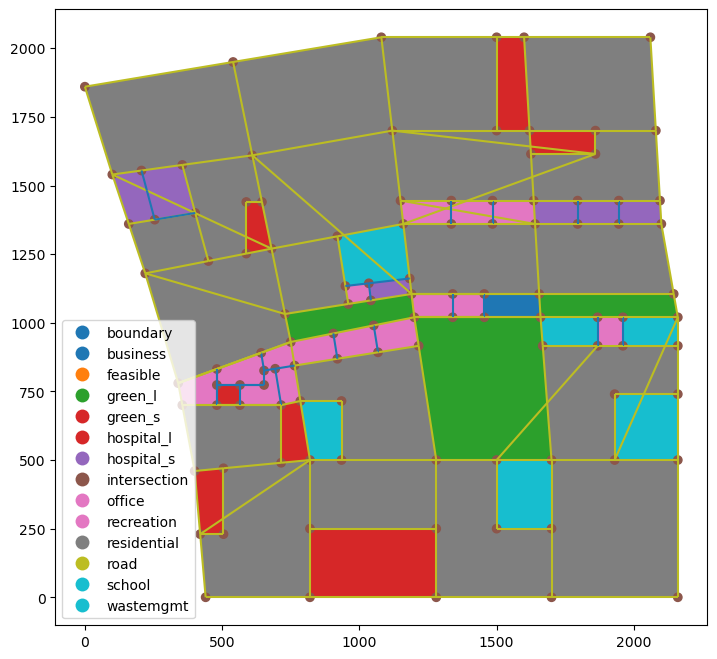

In [11]:
gdf.plot(column="type_leg",legend=True,figsize=(12, 8))

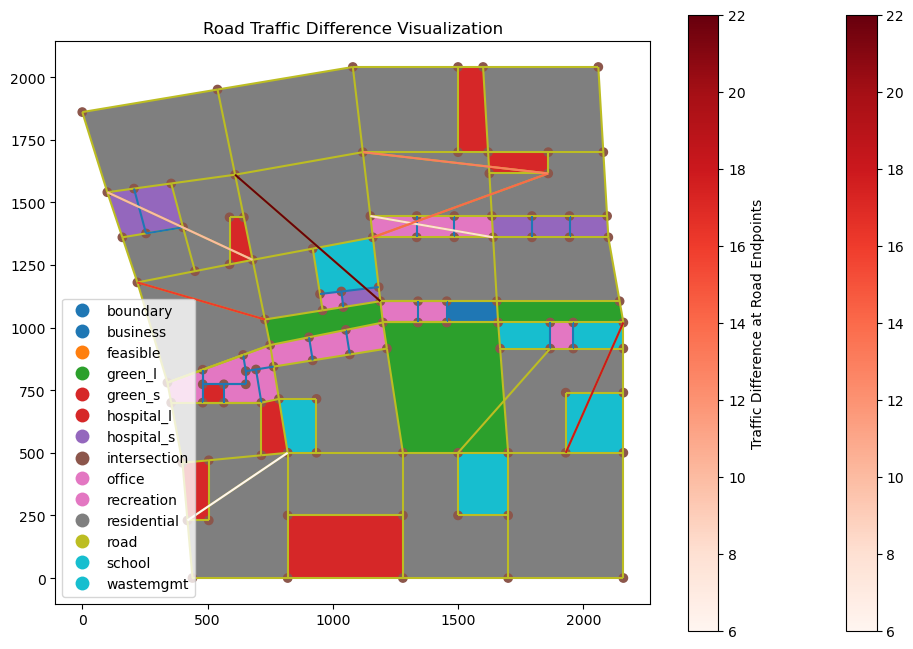

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

road_gdf = gdf[(gdf['geometry'].geom_type == 'LineString') & (gdf['population'] == 5)]

point_gdf = gdf[gdf['geometry'].geom_type == 'Point']

# Calculate traffic difference for each road based on endpoints
traffic_diffs = []
for _, road in road_gdf.iterrows():
    start_point_coord, end_point_coord = road['geometry'].coords[0], road['geometry'].coords[-1]
    
    # Match start and end points in the gdf by filtering points based on coordinates
    start_traffic = point_gdf[(point_gdf['geometry'].x == start_point_coord[0]) & 
                              (point_gdf['geometry'].y == start_point_coord[1])]['traffic'].values
    end_traffic = point_gdf[(point_gdf['geometry'].x == end_point_coord[0]) & 
                            (point_gdf['geometry'].y == end_point_coord[1])]['traffic'].values
    
    # If both start and end traffic values exist, calculate traffic difference
    if len(start_traffic) > 0 and len(end_traffic) > 0:
        traffic_diffs.append(abs(start_traffic[0] - end_traffic[0]))
    else:
        traffic_diffs.append(0)  # Handle cases where a point may not have traffic data

# Add traffic difference column to road_gdf
road_gdf = road_gdf.assign(traffic_diff=traffic_diffs)

# Normalize traffic difference for color scaling
norm = plt.Normalize(vmin=min(traffic_diffs), vmax=max(traffic_diffs))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot base gdf with type_leg as color
gdf.plot(column="type_leg", legend=True, ax=ax)

# Plot roads with color based on traffic difference
road_gdf.plot(column='traffic_diff', cmap='Reds', legend=True, norm=norm, ax=ax)

# Set title and colorbar
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='Reds'), ax=ax, label='Traffic Difference at Road Endpoints')
plt.title("Road Traffic Difference Visualization")
plt.show()


In [11]:
gdf["type_leg"].unique()

array(['road', 'intersection', 'residential', 'green_s', 'feasible',
       'green_l', 'hospital_l', 'boundary', 'school', 'hospital_s',
       'recreation', 'wastemgmt', 'business', 'office'], dtype=object)

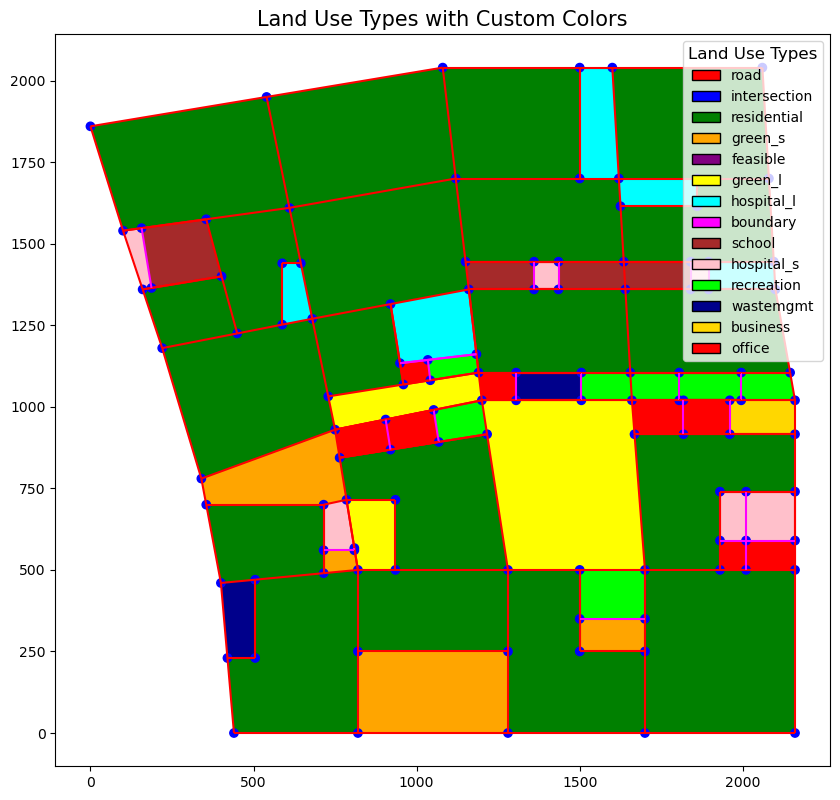

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define distinct and contrasting colors manually
custom_colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 
    'magenta', 'brown', 'pink', 'lime', 'darkblue', 'gold','red'
]

# Get the unique types
unique_types = gdf["type_leg"].unique()

# Create a dictionary that maps each unique type to a distinct color
type_color_map = dict(zip(unique_types, custom_colors))

# Assign colors to the GeoDataFrame based on the type_leg column
gdf["color"] = gdf["type_leg"].map(type_color_map)

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use the assigned colors from the 'color' column
gdf.plot(ax=ax, color=gdf["color"])

# Create legend patches
legend_patches = [Patch(facecolor=color, edgecolor='black', label=land_use_type) 
                  for land_use_type, color in type_color_map.items()]

# Add legend to the plot
ax.legend(handles=legend_patches, title="Land Use Types", loc='upper right', fontsize=10, title_fontsize=12)

# Set plot title and show the plot
ax.set_title("Land Use Types with Custom Colors", fontsize=15)
plt.show()


<Axes: >

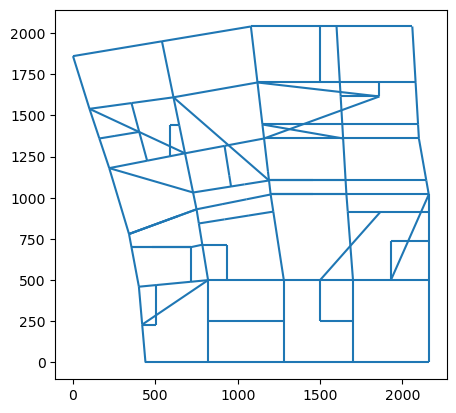

In [14]:
#gdf[gdf['population']==5].shape[0]
gdf[gdf["type"]==2].plot()

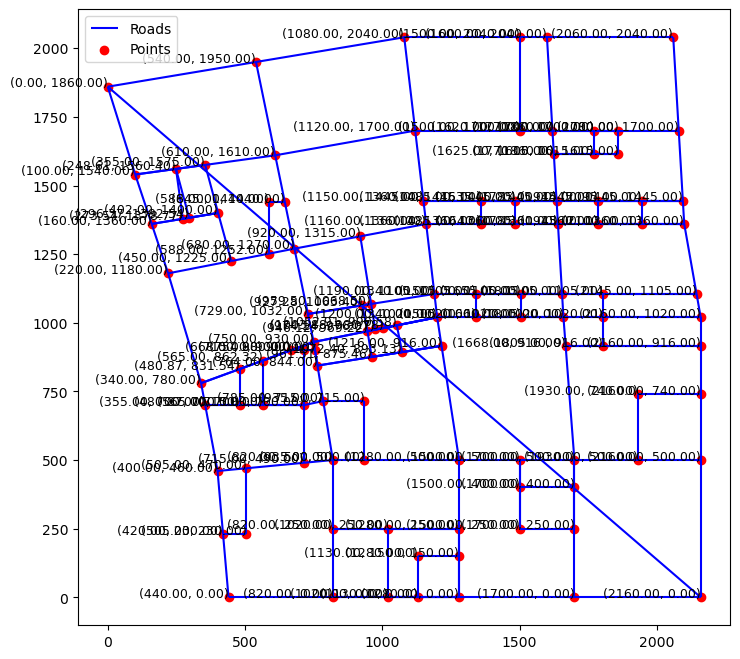

In [29]:
import matplotlib.pyplot as plt

# Filter the GeoDataFrame to include only LineStrings (roads)
roads_gdf = gdf[gdf.geometry.type == 'LineString']

# Filter the GeoDataFrame to include only Points
points_gdf = gdf[gdf.geometry.type == 'Point']

# Plot the roads (LineStrings)
ax = roads_gdf.plot(color='blue', figsize=(10, 8), legend=True, label='Roads')

# Plot the points on the same plot
points_gdf.plot(ax=ax, color='red', marker='o', label='Points')

# Annotate the points with their geometry values (coordinates)
for idx, row in points_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y  # Extract x and y coordinates
    plt.text(x, y, f'({x:.2f}, {y:.2f})', fontsize=9, ha='right')  # Format and display coordinates

# Show the plot
plt.legend()
plt.show()

In [34]:
from shapely.geometry import LineString
import geopandas as gpd

new_line = LineString([(0.00, 1860.00), (2160.00, 0.00)])

# Check if the new LineString already exists in the gdf
if not ((gdf['geometry'] == new_line) & (gdf['type'] == 2)).any():
    # Create a new row for the gdf with the LineString and required attributes
    new_row = {
        'type': 2,               # Assuming '2' is the type for roads
        'existence': True,        # Set existence to True
        'geometry': new_line,     # The LineString geometry
        'population': 5           # Set population to 5 (since it represents a road)
    }

    # Convert the new row into a GeoDataFrame
    new_row_gdf = gpd.GeoDataFrame([new_row], geometry='geometry')

    # Append the new row to the existing gdf
    gdf = pd.concat([gdf, new_row_gdf], ignore_index=True)
    print("New road added to gdf.")
else:
    print("The specified road already exists in the gdf.")


The specified road already exists in the gdf.


In [35]:
gdf

,type,existence,geometry,rect,eqi,sc,population
0,2,True,"LINESTRING (440 0, 820 0)",NaN,NaN,NaN,NaN
1,2,False,"LINESTRING (820 0, 1020 0, 1130 0, 1280 0)",NaN,NaN,NaN,NaN
2,2,True,"LINESTRING (1280 0, 1700 0)",NaN,NaN,NaN,NaN
3,2,True,"LINESTRING (1700 0, 2160 0)",NaN,NaN,NaN,NaN
4,2,True,"LINESTRING (0 1860, 100 1540)",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
420,13,True,"POLYGON ((715 900, 754.884 900, 764 844, 785 7...",0.763517,0.945764,0.687109,NaN
421,8,True,"POLYGON ((750 930, 754.884 900, 715 900, 668 9...",0.500000,0.807934,0.498154,NaN
422,2,True,"LINESTRING (0 1860, 2160 0)",NaN,NaN,NaN,NaN
423,2,True,"LINESTRING (0 1860, 2160 0)",NaN,NaN,NaN,5.0


In [11]:
new_roads = gdf[(gdf['geometry'].geom_type == 'LineString') & 
                (gdf['type'] == 2) & 
                (gdf['population'] == 5)]

new_roads['length'] = new_roads['geometry'].length
mean_length = new_roads['length'].mean()
print(f"The mean length of the new roads is: {mean_length}")

The mean length of the new roads is: 882.5736627493872


/Users/manasvivarma/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [20]:
with open("/Users/manasvivarma/Downloads/working code /urban_planning/cfg/test_data/real/hlg/init_plan_hlg.pickle","rb") as f:
    data = pickle.load(f)


In [21]:
g=data['gdf']

<Axes: >

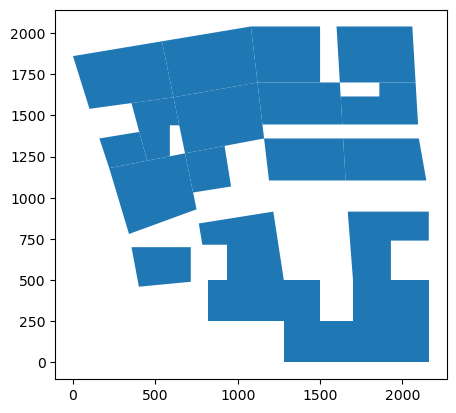

In [22]:
g[g['type']==4].plot()

In [23]:
g.loc[183]

type                                                         15
existence                                                  True
geometry      POLYGON ((820 0, 440 0, 420 230, 505 230, 505 ...
population                                               4794.0
traffic                                                     NaN
Name: 183, dtype: object

<Axes: >

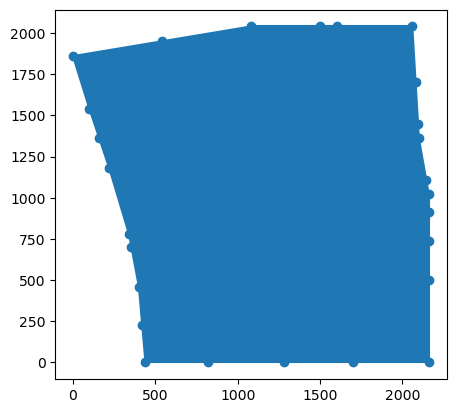

/var/folders/64/wztrq55x0w5_s8m0f0tld8180000gn/T/ipykernel_59795/3583346547.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  g[g['type']==3].plot()


<Axes: >

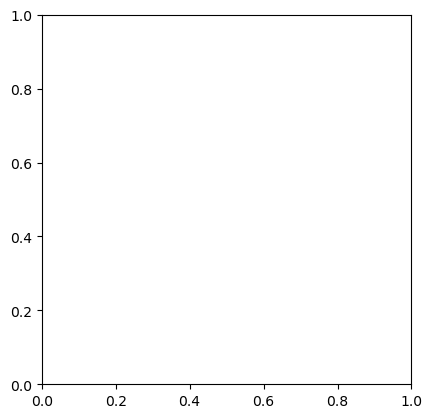

In [31]:
g[g['type']==3].plot()

In [34]:
g[g.geometry.type == 'LineString']

,type,existence,geometry,population,traffic
id,,,,,
0,2,True,"LINESTRING (440 0, 820 0)",NaN,NaN
1,2,True,"LINESTRING (820 0, 1280 0)",NaN,NaN
2,2,True,"LINESTRING (1280 0, 1700 0)",NaN,NaN
3,2,True,"LINESTRING (1700 0, 2160 0)",NaN,NaN
4,2,True,"LINESTRING (0 1860, 100 1540)",NaN,NaN
...,...,...,...,...,...
106,2,True,"LINESTRING (920 1315, 959.5 1068.5)",NaN,NaN
107,2,True,"LINESTRING (729 1032, 959.5 1068.5)",NaN,NaN
108,2,True,"LINESTRING (959.5 1068.5, 1190 1105)",NaN,NaN
